# What is NumPy and why is it important in data analysis?

In [6]:
!pip install numpy

In [7]:
!pip install matplotlib

In [9]:
!pip install seaborn

In [11]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

### First, let's load our sample dataset, which contains several common data quality problems.

In [15]:
# Load data
df = pd.read_csv('dados_problema.csv')
print("Dataframe Format:", df.shape)
df.head()

Dataframe Format: (10, 6)


,id,nome,idade,salario,departamento,data_contratacao
0,1,João Silva,32.0,4500.0,TI,2020-01-15
1,2,Maria Santos,28.0,3800.0,Marketing,2019-06-20
2,3,João Silva,32.0,4500.0,TI,2020-01-15
3,4,Ana Oliveira,NaN,4200.0,TI,2021-03-10
4,5,Pedro Costa,45.0,NaN,Vendas,2018-11-05


## 2. Identifying Missing Values

### Let's check where there are missing values ​​in our dataset.


Missing values ​​by column:
id                  0
nome                0
idade               2
salario             1
departamento        1
data_contratacao    0
dtype: int64


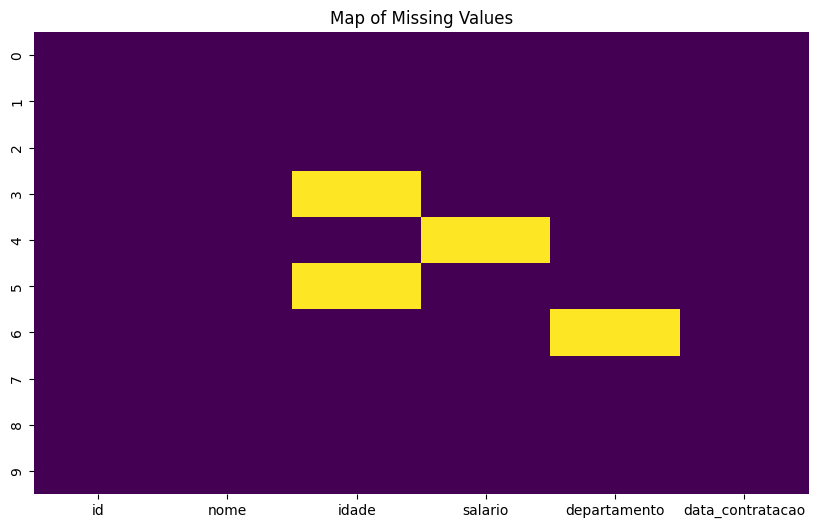

In [17]:
# Verify missing values
print("\nMissing values ​​by column:")
print(df.isnull().sum())

#Viewing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Map of Missing Values')
plt.show()

## 3. Handling Missing Values

There are several strategies to handle missing values:

1. Remove rows with missing values  
2. Fill missing values using mean, median, or mode  
3. Fill missing values with a specific value  

Let's demonstrate each of these approaches:


In [18]:
# 1. Removing rows with missing values
df_removed = df.dropna()
print("DataFrame after removing rows with missing values:")
print(df_removed.shape)

# 2. Filling with mean
df_filled_mean = df.copy()
df_filled_mean['idade'].fillna(df_filled_mean['idade'].mean(), inplace=True)
df_filled_mean['salario'].fillna(df_filled_mean['salario'].mean(), inplace=True)

# 3. Filling with a specific value
df_filled_specific = df.copy()
df_filled_specific['departamento'].fillna("Not specified", inplace=True)

print("\nExample of filling with a specific value:")
print(df_filled_specific['departamento'].value_counts())


DataFrame after removing rows with missing values:
(6, 6)

Example of filling with a specific value:
departamento
TI               5
Marketing        3
Vendas           1
Not specified    1
Name: count, dtype: int64


C:\Users\eduardo.siqueira\AppData\Local\Temp\ipykernel_2596\1845560597.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean['idade'].fillna(df_filled_mean['idade'].mean(), inplace=True)
C:\Users\eduardo.siqueira\AppData\Local\Temp\ipykernel_2596\1845560597.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

## 4. Identifying Duplicates

Let’s identify duplicated rows in our dataset.


In [19]:
# Checking for duplicates
print("Number of duplicated rows:", df.duplicated().sum())

# Showing the duplicated rows
print("\nDuplicated rows:")
print(df[df.duplicated(keep=False)].sort_values('id'))


Number of duplicated rows: 0

Duplicated rows:
Empty DataFrame
Columns: [id, nome, idade, salario, departamento, data_contratacao]
Index: []


## 5. Removing Duplicates

Now we'll remove duplicates and see how this affects our dataset.


In [21]:
# Removing duplicates
df_no_duplicates = df.drop_duplicates()

print("Original format: ", df.shape)
print("Format after removing duplicates: ", df_no_duplicates.shape)

print("\n Dataframe after removing duplicates: ")
df_no_duplicates

Original format:  (10, 6)
Format after removing duplicates:  (10, 6)

 Dataframe after removing duplicates: 


,id,nome,idade,salario,departamento,data_contratacao
0,1,João Silva,32.0,4500.0,TI,2020-01-15
1,2,Maria Santos,28.0,3800.0,Marketing,2019-06-20
2,3,João Silva,32.0,4500.0,TI,2020-01-15
3,4,Ana Oliveira,NaN,4200.0,TI,2021-03-10
4,5,Pedro Costa,45.0,NaN,Vendas,2018-11-05
5,6,Ana Oliveira,NaN,4200.0,TI,2021-03-10
6,7,Carla Lima,35.0,5100.0,NaN,2022-02-28
7,8,Marcos Santos,41.0,4800.0,Marketing,2020-09-15
8,9,Lucia Ferreira,29.0,3900.0,TI,2021-07-01
9,10,Marcos Santos,41.0,4800.0,Marketing,2020-09-15


## 6. Summary of Cleaning Operations

Let's create a function that applies all cleaning techniques we learned.


In [22]:
def clean_data(df):
    # Create a copy of the DataFrame
    df_clean = df.copy()

    # Remove duplicates
    df_clean = df_clean.drop_duplicates()

    # Fill missing values (mean)
    df_clean['idade'] = df_clean['idade'].fillna(df_clean['idade'].mean())
    df_clean['salario'] = df_clean['salario'].fillna(df_clean['salario'].mean())

    # Fill missing values (specific value)
    df_clean['departamento'] = df_clean['departamento'].fillna("NOT SPECIFIED")

    # String cleaning
    df_clean['nome'] = df_clean['nome'].str.strip().str.upper()
    df_clean['departamento'] = df_clean['departamento'].str.strip().str.upper()

    return df_clean

df_final = clean_data(df)

print("DataFrame after applying all cleaning operations:")
df_final

